# GDAA 2000 – Data Mining Fundamentals

## Project #3 - Geospatial Data Analytics with Python
### Basic Machine Learning Workflows in Python

### Alex Moss

## Introduction

For the final project in the Data Mining Fundamentals course, a basic machine learning workflow will be created in Python. The data used in this Jupyter Notebook was derived from Canadian Dissemination Area data found in the Business Analyst Canada 2023 dataset, provided by ESRI Canada. It is for educational and demonstration purposes only, and should not be shared without permission.

The sample of the data used for this project are DAs found in the city of Montreal. It has been enriched with various demographic and spending variables, which will serve as the target variable and predictors for the model building portion of the project. These variables include:

- 2023 HH Inc: Median Curr$

- 2023 Total Pop Median Age

- 2023 Labour Force - Employed : Percent

- 2023 Edu 15+ Degree : Percent

- 2023 Food Purch From Restaurants : Percent

- 2023 Tobacco/Alcohol : Percent

- 2023 Games of Chance : Percent

- 2023 Recreation : Percent

- 2023 Rent : Percent

The intention is to utilize the first 8 variables on this list as the model's predictors, and have the final variable, rent, be used as the target variable.

This project's workflow shoud include all of the following tasks:

- Data Importing
    
- Data Exploration
    
- Data Preparation
    
- Model Training
    
- Model Evaluation
    
- Summary

## Load in Required Python Packages

Important to ensure all required Python packages are loaded into our notebook.

In [118]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from mapclassify import NaturalBreaks
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Importing

Seeing as the dataset being used for this project is spatial, the Geopandas package will be used to import the data into this notebook.

In [119]:
## Import the data

shapefile_path = r"E:\\NSCC\\Semester_2\\GDAA2000_DataMining_Fundys\\Project_3\data\\MTL_DAs\\MTL_DAs.shp"

Montreal_DAs = gpd.read_file(shapefile_path)

Montreal_DAs.head()

,ID,NAME,ECYPTAPOP,RG_NAME,RG_ABBREV,HasData,aggregatio,HouseholdI,FiveYearPo,LabourForc,Educationa,Food_HSFD9,TobaccoPro,GamesOfCha,Recreation,Shelter_HS,Shape_Leng,Shape_Area,geometry
0,24663103,"24663103, QC",661,Quebec / Québec,QC,1,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,89642.86,51.7,56.48,45.12,2.89,2.82,0.43,3.50,1.79,3859.228716,762056.600272,"POLYGON ((-8224495.932 5688980.246, -8224483.3..."
1,24663104,"24663104, QC",441,Quebec / Québec,QC,1,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,134821.43,46.6,62.30,55.46,2.80,2.96,0.34,3.64,1.15,2612.922523,404171.624723,"POLYGON ((-8224311.587 5688290.770, -8224343.8..."
2,24663105,"24663105, QC",607,Quebec / Québec,QC,1,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,177083.33,46.6,60.39,56.67,2.77,2.89,0.33,3.56,1.12,4057.007491,565618.496934,"POLYGON ((-8223448.416 5688255.877, -8223469.6..."
3,24663106,"24663106, QC",633,Quebec / Québec,QC,1,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,194318.18,50.3,53.98,59.81,2.36,2.89,0.19,3.45,0.57,11027.391482,961769.356340,"MULTIPOLYGON (((-8222349.136 5688352.784, -822..."
4,24663107,"24663107, QC",815,Quebec / Québec,QC,1,BlockApportionment:CAN.DA;PointsLayer:CAN.Bloc...,220625.00,52.2,52.99,50.73,2.37,2.90,0.19,3.41,0.59,6073.631547,955961.475545,"POLYGON ((-8224062.677 5687393.436, -8224085.3..."


## Data Preparation Part 1

In [120]:
# Print the column names. Important to identify problematic or uninformative column names and change them before any potential mistakes can be made.
print(Montreal_DAs.columns)

Index(['ID', 'NAME', 'ECYPTAPOP', 'RG_NAME', 'RG_ABBREV', 'HasData',
       'aggregatio', 'HouseholdI', 'FiveYearPo', 'LabourForc', 'Educationa',
       'Food_HSFD9', 'TobaccoPro', 'GamesOfCha', 'Recreation', 'Shelter_HS',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [121]:
# Renaming our predictor & target variables, as well as the DA population column.
Montreal_DAs = Montreal_DAs.rename(columns={
    'ECYPTAPOP': 'Total_DA_Pop',
    'HouseholdI': 'Median_HH_Income',
    'FiveYearPo': 'Median_Pop_Age',
    'LabourForc': 'InLabourForce_Employed_%',
    'Educationa': 'Pop_WithDegree_%',
    'Food_HSFD9': 'Food_Spending_Restauraunt_%',
    'TobaccoPro': 'TobaccoAlcohol_Spending_%',
    'GamesOfCha': 'GamesofChance_Spending_%',
    'Recreation': 'Recreation_Spending_%',
    'Shelter_HS': 'Rent_Spending_%'
})

# Print the updated variable names to verify changes
print(Montreal_DAs.columns)

Index(['ID', 'NAME', 'Total_DA_Pop', 'RG_NAME', 'RG_ABBREV', 'HasData',
       'aggregatio', 'Median_HH_Income', 'Median_Pop_Age',
       'InLabourForce_Employed_%', 'Pop_WithDegree_%',
       'Food_Spending_Restauraunt_%', 'TobaccoAlcohol_Spending_%',
       'GamesofChance_Spending_%', 'Recreation_Spending_%', 'Rent_Spending_%',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [122]:
# Verify the data types for our variables
print(Montreal_DAs.dtypes)

ID                               object
NAME                             object
Total_DA_Pop                      int64
RG_NAME                          object
RG_ABBREV                        object
HasData                           int64
aggregatio                       object
Median_HH_Income                float64
Median_Pop_Age                  float64
InLabourForce_Employed_%        float64
Pop_WithDegree_%                float64
Food_Spending_Restauraunt_%     float64
TobaccoAlcohol_Spending_%       float64
GamesofChance_Spending_%        float64
Recreation_Spending_%           float64
Rent_Spending_%                 float64
Shape_Leng                      float64
Shape_Area                      float64
geometry                       geometry
dtype: object


In [123]:
# Get an idea of how big our dataset is
print("There are", Montreal_DAs.shape[0], "records with", Montreal_DAs.shape[1], "variables.")

There are 3259 records with 19 variables.


In [124]:
#Check for Nulls
print(Montreal_DAs.isnull().sum())

ID                             0
NAME                           0
Total_DA_Pop                   0
RG_NAME                        0
RG_ABBREV                      0
HasData                        0
aggregatio                     0
Median_HH_Income               0
Median_Pop_Age                 0
InLabourForce_Employed_%       0
Pop_WithDegree_%               0
Food_Spending_Restauraunt_%    0
TobaccoAlcohol_Spending_%      0
GamesofChance_Spending_%       0
Recreation_Spending_%          0
Rent_Spending_%                0
Shape_Leng                     0
Shape_Area                     0
geometry                       0
dtype: int64


In [125]:
#Check for 0s
print((Montreal_DAs == 0).sum())

ID                             0
NAME                           0
Total_DA_Pop                   5
RG_NAME                        0
RG_ABBREV                      0
HasData                        0
aggregatio                     0
Median_HH_Income               5
Median_Pop_Age                 5
InLabourForce_Employed_%       8
Pop_WithDegree_%               9
Food_Spending_Restauraunt_%    6
TobaccoAlcohol_Spending_%      6
GamesofChance_Spending_%       6
Recreation_Spending_%          6
Rent_Spending_%                6
Shape_Leng                     0
Shape_Area                     0
geometry                       0
dtype: int64


It is important to check for more than just null values. Sometimes null values can be represented by a 0 or -99. Quickly inspecting the data in ArcGIS Pro before importing it into this notebook, no strange values such as -99 were noticed. Next, we look at how many 0s there are in the data. Looking at the above output, we know for sure we can get rid of the rows that have 0 DA population. As for the rest of the 0s, we are unsure whether they are legitimate or acting as missing data. Given there are not many 0s, they will all be removed later in the notebook. 

## Data Exploration

Exploratory data analysis (EDA) of our variables includes examing the distribution of values within each variable. For this project, the target and predictor variable distributions will be looked at to check for skews or other non-normal distributions. Once visualized, it will be determined if these issues can be fixed using legitimate data transformation approaches.

Firstly, the target variable will be looked at.

### Map Target Variable

Since our dataset is spatial in nature, using the matplotlib and mapclassify packages, we can map our target variable to get a sense of its spatial distribution. 





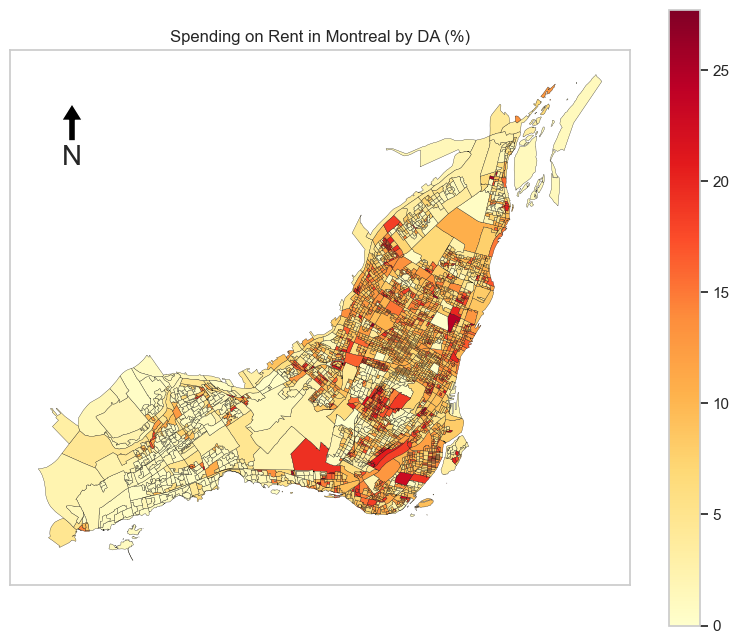

In [126]:
# Classify the data using natural breaks
classifier = NaturalBreaks(Montreal_DAs['Rent_Spending_%'], k=5)

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

Montreal_DAs.plot(column='Rent_Spending_%', cmap='YlOrRd', linewidth=0.2, ax=ax, edgecolor='black',
                 legend=True, legend_kwds={'label': "", 'orientation': "vertical"})

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add title
plt.title('Spending on Rent in Montreal by DA (%)')

x, y, arrow_length = 0.1, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)


# Show the plot
plt.show()

The Southwest and North ends of the city are showing relatively low spending percentages on rent. In the middle of the city, where the DAs are the most dense, there is a healthy mix of spending percentages on rent. 

### Plot target variable

The distribution of rent spending percentage will be visualized with the output below.

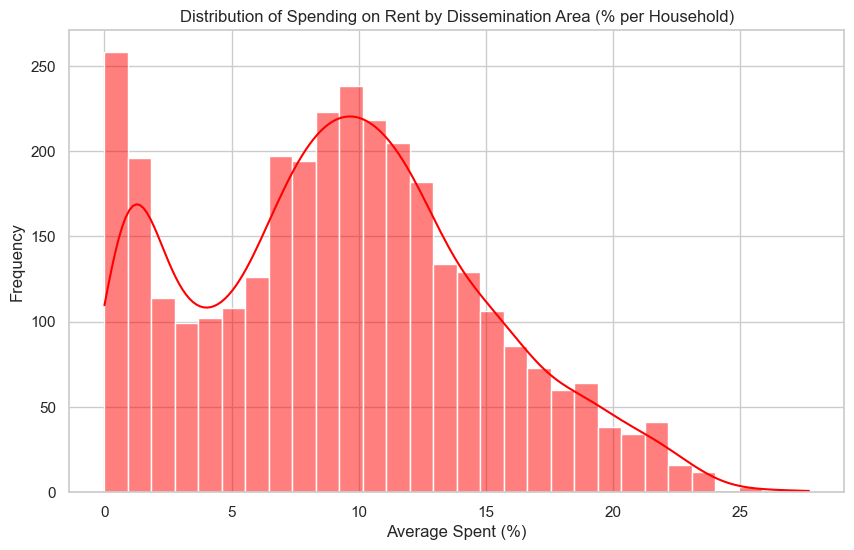

In [127]:
# Use the 'style' argument to ensure that a grid appears (this is optional) in the plot
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=Montreal_DAs, x='Rent_Spending_%', bins=30, kde=True, color='red')
plt.title('Distribution of Spending on Rent by Dissemination Area (% per Household)')
plt.xlabel('Average Spent (%)')
plt.ylabel('Frequency')

plt.show()

Looking at the output above, which shows the distribution graph of our target variable, the first thing that stands out is that it has a bimodal distribution. There are a number of factors that could explain the distribution of our target variable. 

- Montreal is often considered a "renter's city", espcecially compared to the other big cities in Canada. This means that it has very strong tenant rights and rent control as a large majority of residents are renters. In 2023, a study found that Montreal is the only Canadian city where more residents rent instead of own their home. This could explain a number of the lower rent percentages shown in the graph.

- Specific demographic groups, such as elderly individuals on fixed incomes or students living in subsidized housing, may contribute to a concentration of households with lower rent percentages.

- High income households that find themselves in a rent controlled unit would result in lower rent percentages.

- The cost of living and housing prices can vary widely between different regions and neighborhoods. Some areas may have more affordable housing options, leading to lower rent percentages. While looking at the mapped spatial distribution of the target variable, there were visibly certain region that consistenly had lower rent percentages.

- There are affordable housing programs or subsidies that a number of households may qualify for which would reduce how much they pay for rent. 

Any number of the above factors could be contributing to the resulting distribution, as well as some other factors, or even some data anomalies or data acquisition errors. 

### Plot Predictor Variables

Our predictor variables will now be plotted to determine if any data transformations will be required. 

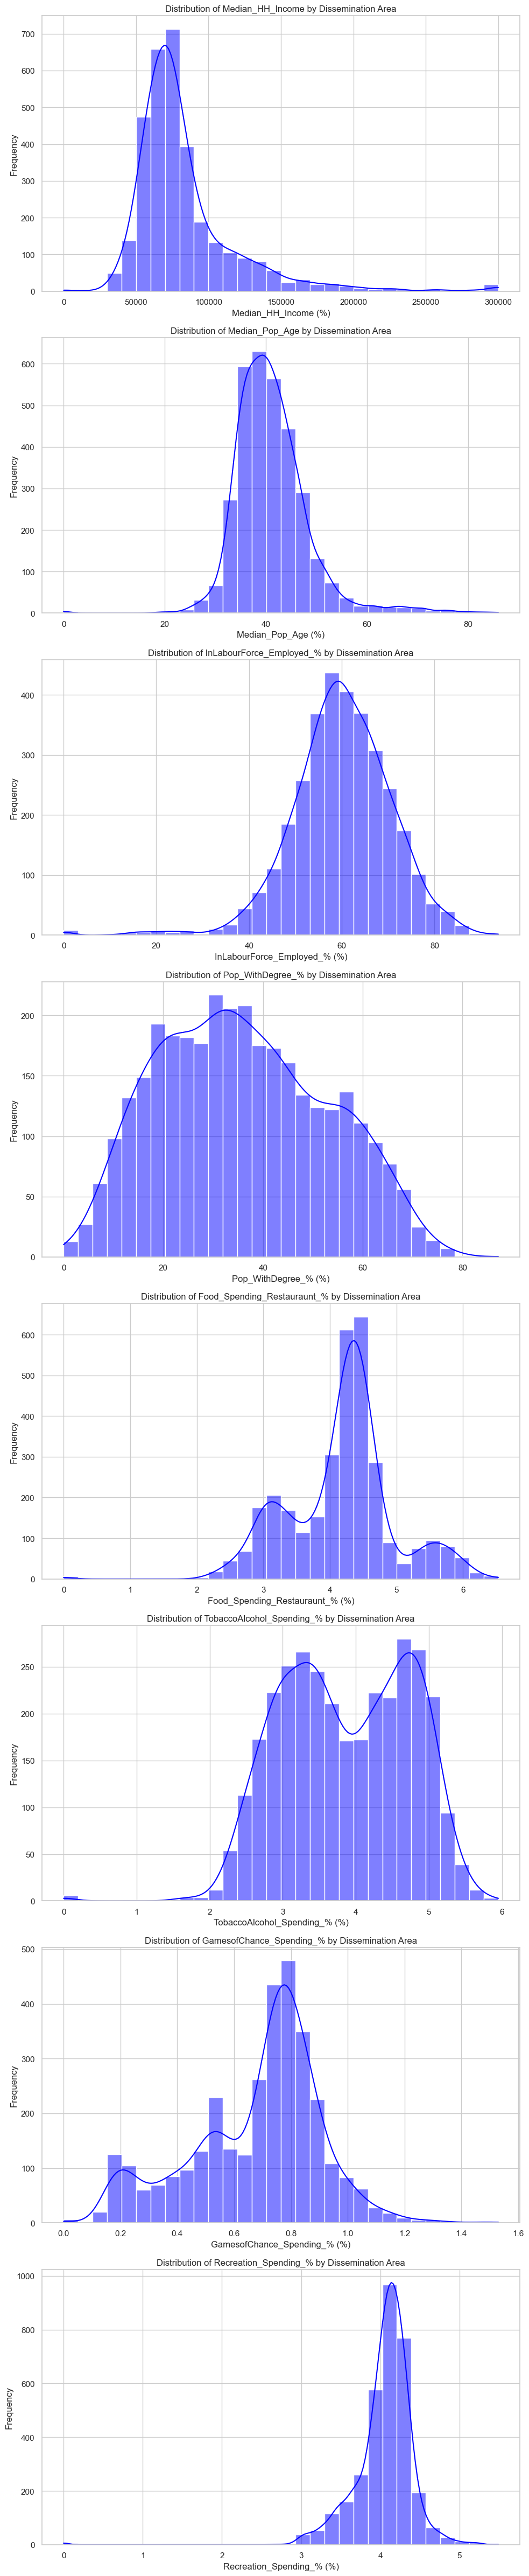

In [128]:

# List of target variables
predictor_variables = ['Median_HH_Income', 'Median_Pop_Age', 'InLabourForce_Employed_%','Pop_WithDegree_%', 'Food_Spending_Restauraunt_%', 'TobaccoAlcohol_Spending_%', 'GamesofChance_Spending_%', 
                    'Recreation_Spending_%']

# Use the 'style' argument to ensure that a grid appears (this is optional)
sns.set(style="whitegrid")

# Create subplots based on the number of target variables
fig, axes = plt.subplots(len(predictor_variables), 1, figsize=(10, 6 * len(predictor_variables)))

# Iterate through each target variable
for i, target_var in enumerate(predictor_variables):
    # Create a histogram using seaborn
    sns.histplot(data=Montreal_DAs, x=target_var, bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {target_var} by Dissemination Area')
    axes[i].set_xlabel(f'{target_var} (%)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of these graphs have skews or non-normal distributions. These graphs will be reproduced after the second part of the data preparation phase, which will trim outliers using the IQR method, hopefully producing nicer looking distributions.

## Data Preparation Part 2

Firstly, lets visualize where on the map the 5 DAs without any people in them are located.

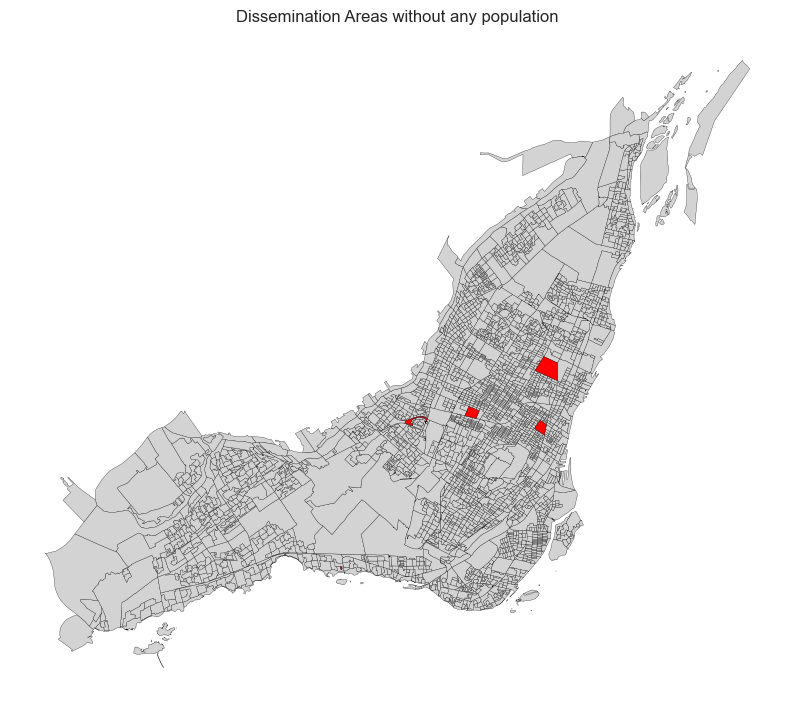

In [129]:
# Filter the data to include only DAs where Population is equal to 0
zero_population = Montreal_DAs[Montreal_DAs['Total_DA_Pop'] == 0]

ax = Montreal_DAs.plot(color='lightgrey', linewidth=0.2, edgecolor='black', figsize=(10, 10))
zero_population.plot(ax=ax, color='red', linewidth=0.2, edgecolor='black')
ax.set_axis_off()
ax.set_title('Dissemination Areas without any population')

plt.show()

In [130]:
# Given where these dissemination areas are located, and after consulting Google maps while referencing the above output, 4 of the 5 DAs are green spaces. The oddly shaped DA to the West does not 
# show up as a green space on Google Maps but regardless, these rows will be trimmed from our dataset. 

# Filter dataset to not contain any 0 population DAs
Montreal_DAs_filtered = Montreal_DAs[Montreal_DAs['Total_DA_Pop'] != 0]

In [131]:
# Verify that there are no more DAs with 0 population
population_zero = (Montreal_DAs_filtered['Total_DA_Pop'] == 0).sum()

print("DAs with zero population:", population_zero)

DAs with zero population: 0


In [132]:
# Check how many other columns still contain 0s
print((Montreal_DAs_filtered == 0).sum())

ID                             0
NAME                           0
Total_DA_Pop                   0
RG_NAME                        0
RG_ABBREV                      0
HasData                        0
aggregatio                     0
Median_HH_Income               0
Median_Pop_Age                 0
InLabourForce_Employed_%       3
Pop_WithDegree_%               4
Food_Spending_Restauraunt_%    1
TobaccoAlcohol_Spending_%      1
GamesofChance_Spending_%       1
Recreation_Spending_%          1
Rent_Spending_%                1
Shape_Leng                     0
Shape_Area                     0
geometry                       0
dtype: int64


In [133]:
# Even though the rest of the 0s in the dataset could be legit, due to the small number of them, and the chance that they are representing null values, they will all be removed. 

target_columns = ['InLabourForce_Employed_%', 'Pop_WithDegree_%', 'Food_Spending_Restauraunt_%',
                   'TobaccoAlcohol_Spending_%', 'GamesofChance_Spending_%', 'Recreation_Spending_%', 'Rent_Spending_%']

Montreal_DAs_filteredfinal = Montreal_DAs_filtered[
    (Montreal_DAs_filtered[target_columns] != 0).all(axis=1)
]

In [134]:
# Check to see all 0s have been removed
print((Montreal_DAs_filteredfinal == 0).sum())

ID                             0
NAME                           0
Total_DA_Pop                   0
RG_NAME                        0
RG_ABBREV                      0
HasData                        0
aggregatio                     0
Median_HH_Income               0
Median_Pop_Age                 0
InLabourForce_Employed_%       0
Pop_WithDegree_%               0
Food_Spending_Restauraunt_%    0
TobaccoAlcohol_Spending_%      0
GamesofChance_Spending_%       0
Recreation_Spending_%          0
Rent_Spending_%                0
Shape_Leng                     0
Shape_Area                     0
geometry                       0
dtype: int64


In [135]:
# Get an idea of how big our dataset is after filtering out the 0s
print("There are", Montreal_DAs_filteredfinal.shape[0], "records with", Montreal_DAs_filteredfinal.shape[1], "variables.")

There are 3246 records with 19 variables.


13 rows were removed from the dataset.

### Trimming Outliers

There are a number of different approaches that can be taken to trim outliers for our numeric variables. Due to many of our variables not having a normal distribution, the interquartile range (IQR) method will be used instead of the proposed standard deviation threshold. The IQR method does not require the distribution to be normal. To implement the IQR method, firstly calculate the IQR, which is the range between the first (Q1) and third (Q3) quartiles. Outliers are then identified as values outside of the range (Q1−1.5×IQR,Q3+1.5×IQR).


In [136]:
# Calculate the interquartile range (IQR)
Q1 = Montreal_DAs_filteredfinal['Rent_Spending_%'].quantile(0.25)
Q3 = Montreal_DAs_filteredfinal['Rent_Spending_%'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to keep only values within the defined bounds
Montreal_DAs_trimtarget = Montreal_DAs_filteredfinal[(Montreal_DAs_filteredfinal['Rent_Spending_%'] >= lower_bound) & (Montreal_DAs_filteredfinal['Rent_Spending_%'] <= upper_bound)]

# Display the summary statistics after trimming outliers
print(Montreal_DAs_trimtarget['Rent_Spending_%'].describe())

count    3241.000000
mean        9.229580
std         5.540039
min         0.210000
25%         5.070000
50%         9.260000
75%        12.830000
max        23.760000
Name: Rent_Spending_%, dtype: float64


In [137]:
# Verify the dimensions of the input and output data frames
print("Dimensions of Montreal_DAs_filteredfinal:", Montreal_DAs_filteredfinal.shape)
print("Dimensions of Montreal_DAs_trimtarget:", Montreal_DAs_trimtarget.shape)

Dimensions of Montreal_DAs_filteredfinal: (3246, 19)
Dimensions of Montreal_DAs_trimtarget: (3241, 19)


We trimmed 5 outliers from our target variable. Now we will apply the same IQR method to our predictor variables. 

In [138]:
def remove_outliers_by_iqr(Montreal_DAs_trimtarget, numeric_columns):
    for col in numeric_columns:
        # Calculate the interquartile range (IQR)
        Q1 = Montreal_DAs_trimtarget[col].quantile(0.25)
        Q3 = Montreal_DAs_trimtarget[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataset to keep only values within the defined bounds
        Montreal_DAs_trimtarget = Montreal_DAs_trimtarget[(Montreal_DAs_trimtarget[col] >= lower_bound) & (Montreal_DAs_trimtarget[col] <= upper_bound)]

    return Montreal_DAs_trimtarget

# Assuming Montreal_DAs_filtered is your DataFrame
numeric_columns_to_remove_outliers = ['Median_HH_Income', 'Median_Pop_Age', 'InLabourForce_Employed_%', 'Pop_WithDegree_%',
                                       'Food_Spending_Restauraunt_%', 'TobaccoAlcohol_Spending_%', 'GamesofChance_Spending_%', 'Recreation_Spending_%']

Montreal_DAs_trimall = remove_outliers_by_iqr(Montreal_DAs_trimtarget, numeric_columns_to_remove_outliers)

# Display the summary statistics after trimming outliers
print(Montreal_DAs_trimall.describe())

       Total_DA_Pop  HasData  Median_HH_Income  Median_Pop_Age  \
count   2118.000000   2118.0       2118.000000     2118.000000   
mean     626.324835      1.0      73066.515411       39.610670   
std      317.949899      0.0      16016.130078        4.797362   
min      110.000000      1.0      30322.580000       25.300000   
25%      474.000000      1.0      62430.557500       36.125000   
50%      565.000000      1.0      71237.245000       39.300000   
75%      688.000000      1.0      80522.945000       42.400000   
max     7396.000000      1.0     131793.480000       54.800000   

       InLabourForce_Employed_%  Pop_WithDegree_%  \
count               2118.000000       2118.000000   
mean                  60.786289         33.164655   
std                    9.438665         15.625748   
min                   36.040000          1.350000   
25%                   54.282500         20.645000   
50%                   60.055000         31.595000   
75%                   67.207500   

From the summary statistics, we can see that we are down to 2118 rows, down 1123 rows after trimming outliers from our 8 predictors. 

After trimming the outliers, it's a good idea to check back on the distributions of all of the variables.

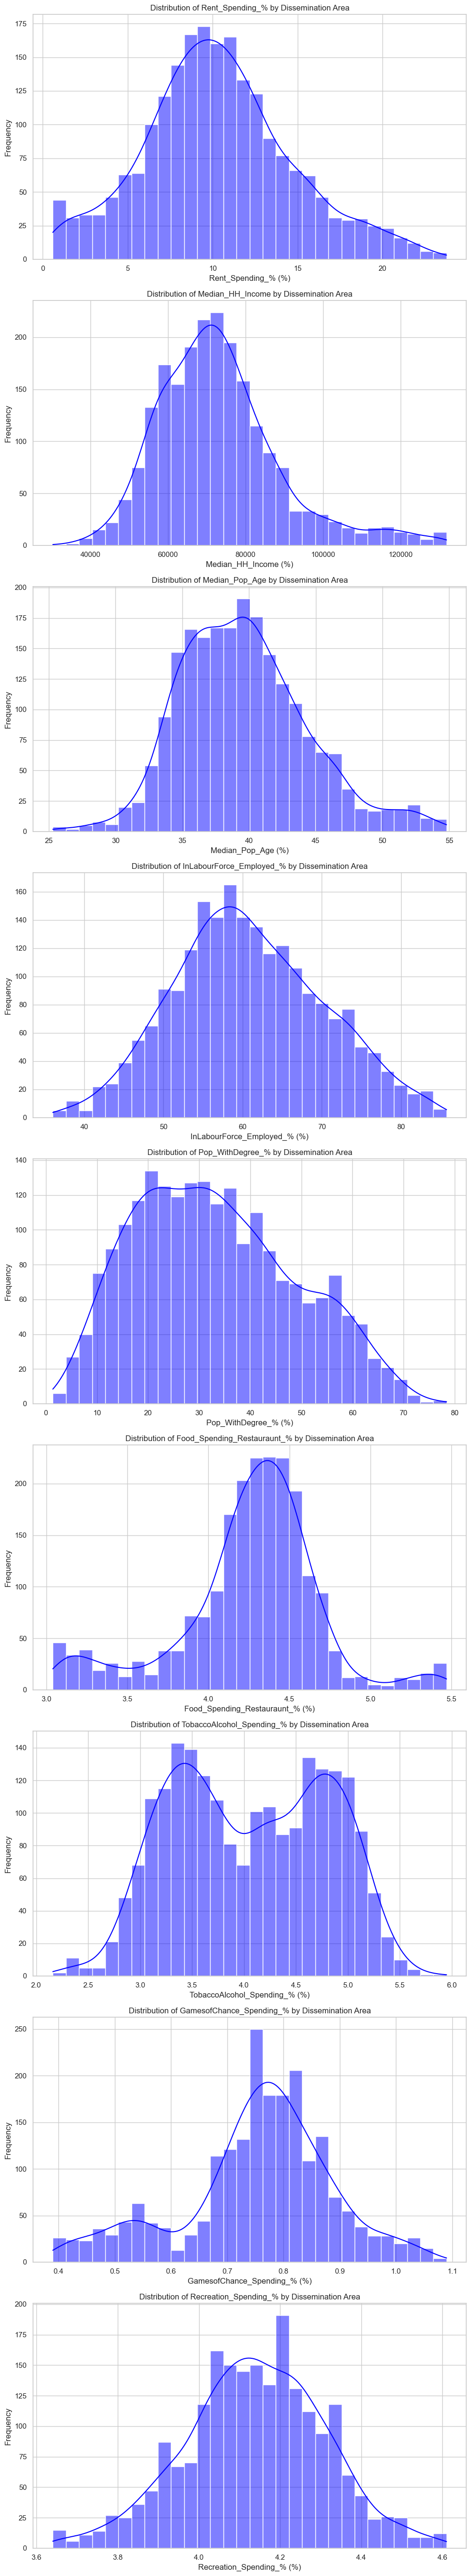

In [139]:
# List of target variables
predictor_variables = ['Rent_Spending_%', 'Median_HH_Income', 'Median_Pop_Age', 'InLabourForce_Employed_%','Pop_WithDegree_%', 'Food_Spending_Restauraunt_%', 'TobaccoAlcohol_Spending_%', 
                       'GamesofChance_Spending_%', 'Recreation_Spending_%']

# Use the 'style' argument to ensure that a grid appears (this is optional)
sns.set(style="whitegrid")

# Create subplots based on the number of target variables
fig, axes = plt.subplots(len(predictor_variables), 1, figsize=(10, 6 * len(predictor_variables)))

# Iterate through each target variable
for i, target_var in enumerate(predictor_variables):
    # Create a histogram using seaborn
    sns.histplot(data=Montreal_DAs_trimall, x=target_var, bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {target_var} by Dissemination Area')
    axes[i].set_xlabel(f'{target_var} (%)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Just about all of the variable distributions are looking much closer to normal distributions after all of the outlier trimming. 

### Target Variable Discretizing

In this project, the target variable will be discretized, using the 'qcut' method. The 'qcut' method divides the data into quantiles based on the number of quantiles specified. In our case, we chose 4 quantiles, which will bin the target variable into four different categories: Very Low, Low, High, Very High.

In [140]:
# Create labels for quantiles
labels = ["Very Low", "Low", "High", "Very High"]

# Discretize Rent_Spending_% into four quantiles with equal counts and assign custom labels
Montreal_DAs_binned = Montreal_DAs_trimall.copy()  # Make a copy to avoid modifying the original
Montreal_DAs_binned['Rent_Spending_Quantiles'] = pd.qcut(Montreal_DAs_trimall['Rent_Spending_%'], q=4, labels=labels)

# Preview the results
print(Montreal_DAs_binned[['Rent_Spending_%', 'Rent_Spending_Quantiles']].head())

    Rent_Spending_% Rent_Spending_Quantiles
17             9.49                     Low
18             8.13                     Low
19            14.38               Very High
20             5.10                Very Low
22             4.75                Very Low


In [141]:
# Group by the 'Rent_Spending_Quantiles' and calculate summary statistics so that we can see the range of values for each class label
quantiles_summary = Montreal_DAs_binned.groupby('Rent_Spending_Quantiles')['Rent_Spending_%'].agg(['count', 'mean', 'min', 'max'])

# Print the summary statistics
print(quantiles_summary)

                         count       mean    min    max
Rent_Spending_Quantiles                                
Very Low                   531   4.902147   0.59   7.50
Low                        529   8.829943   7.51  10.06
High                       528  11.369337  10.07  12.89
Very High                  530  16.163849  12.91  23.76


C:\Users\Alex\AppData\Local\Temp\ipykernel_21188\3285568405.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles_summary = Montreal_DAs_binned.groupby('Rent_Spending_Quantiles')['Rent_Spending_%'].agg(['count', 'mean', 'min', 'max'])


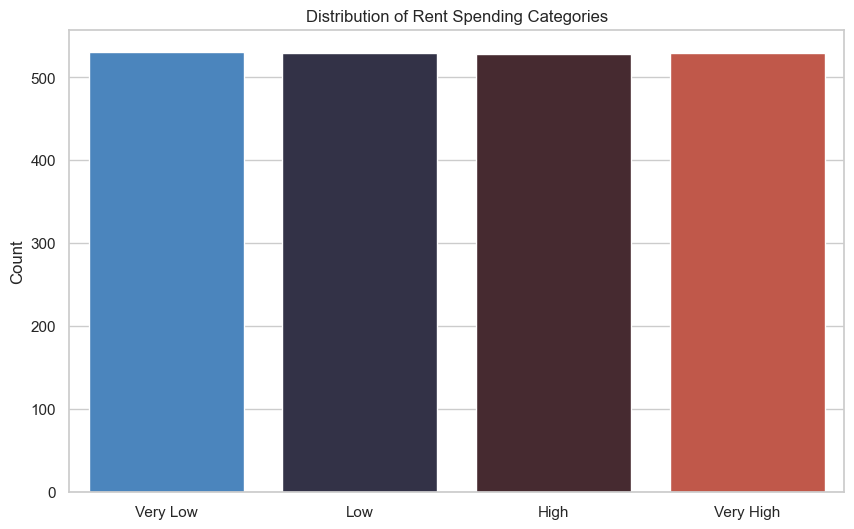

In [142]:
# Reviewing the output, we can see that the spending percentages are now assigned one of our four class labels. 
# To ensure that the new variable is balanced, quick bar plot will be created.

# Bar plot to visualize target variable discretizing
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=Montreal_DAs_binned, x='Rent_Spending_Quantiles', order=labels, hue='Rent_Spending_Quantiles', palette='icefire', legend=False)
plt.title('Distribution of Rent Spending Categories')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [143]:
# The new binned variable is evenly distributed, as shown by the above bar plot.

# Check that it is now a categorical variable
print(Montreal_DAs_binned.dtypes)

ID                               object
NAME                             object
Total_DA_Pop                      int64
RG_NAME                          object
RG_ABBREV                        object
HasData                           int64
aggregatio                       object
Median_HH_Income                float64
Median_Pop_Age                  float64
InLabourForce_Employed_%        float64
Pop_WithDegree_%                float64
Food_Spending_Restauraunt_%     float64
TobaccoAlcohol_Spending_%       float64
GamesofChance_Spending_%        float64
Recreation_Spending_%           float64
Rent_Spending_%                 float64
Shape_Leng                      float64
Shape_Area                      float64
geometry                       geometry
Rent_Spending_Quantiles        category
dtype: object


Rent_Spending_Quantiles is our new, categorical, target variable.

### Variable Selection

The next step in data preparation is to remove any variables not required for the modelling phase. Referring to the list of variables from the above output, these variables can be removed from the dataset moving forward:
- 'ID'
- 'NAME'
- 'RG_NAME'
- 'RG_ABBREV'
- 'HasData'
- 'aggregatio'
- 'Rent_Spending_%'
- 'Shape_Leng'
- 'Shape_Area'
- 'geometry'

We did not properly import data to be able to use the geometry column as a predictor variable, so it must be dropped. Although 'Total_DA_Pop' was not originally considered a potential predictor, we will move forward to the modelling phase while using it as a predictor. 

In [144]:
# Remove the unwanted columns
columns_to_remove = ['ID', 'NAME', 'RG_NAME', 'RG_ABBREV', 'HasData', 'aggregatio', 'Rent_Spending_%', 'Shape_Leng', 'Shape_Area', 'geometry']

Montreal_DAs_select = Montreal_DAs_binned.drop(columns=columns_to_remove)

print(Montreal_DAs_select.dtypes)

Total_DA_Pop                      int64
Median_HH_Income                float64
Median_Pop_Age                  float64
InLabourForce_Employed_%        float64
Pop_WithDegree_%                float64
Food_Spending_Restauraunt_%     float64
TobaccoAlcohol_Spending_%       float64
GamesofChance_Spending_%        float64
Recreation_Spending_%           float64
Rent_Spending_Quantiles        category
dtype: object


## Predictor Scaling

For our predictor variables, Z-score scaling will be applied to standardize all of the values. Standardizing all of our numeric predictors allows them to be measured in a common unit, which simplifies comparing them and prevents any bias in the model building phase. 

We will use the 'StandardScaler' module from 'scikit-learn' to scale our data. 

In [145]:
# We will use the `StandardScaler` module from `scikit-learn` to scale our data. 

# Set the scaler
scaler = StandardScaler()

# Select only the numeric variables
numeric_columns = ['Total_DA_Pop', 'Median_HH_Income', 'Median_Pop_Age', 
                   'InLabourForce_Employed_%', 'Pop_WithDegree_%', 'Food_Spending_Restauraunt_%',
                   'TobaccoAlcohol_Spending_%', 'GamesofChance_Spending_%', 'Recreation_Spending_%']

# Transform the selected variables
Montreal_DAs_scaled = Montreal_DAs_select.copy()
Montreal_DAs_scaled[numeric_columns] = scaler.fit_transform(Montreal_DAs_scaled[numeric_columns])

print(Montreal_DAs_scaled.head())

    Total_DA_Pop  Median_HH_Income  Median_Pop_Age  InLabourForce_Employed_%  \
17     -0.400550         -0.666143       -0.148173                  0.763393   
18     -0.343924         -0.538464       -0.961312                 -0.227447   
19      0.172002         -1.222910       -0.544317                 -0.506154   
20      0.178294          0.313420        2.353793                 -1.009522   
22     -0.529532          0.577128       -0.002225                  0.329967   

    Pop_WithDegree_%  Food_Spending_Restauraunt_%  TobaccoAlcohol_Spending_%  \
17         -0.413176                    -0.299216                   1.016382   
18          1.849010                    -1.028437                  -0.838399   
19          0.142449                    -0.162487                  -0.378089   
20          0.257671                    -2.509667                  -0.594705   
22         -1.506502                    -1.552564                  -1.664250   

    GamesofChance_Spending_%  Recreati

Looking at the above output, we can see that the values have been properly scaled. The data preparation is finally done and we can move on to the modelling phase.

## Building a Classification Model

With the help of the 'scikit-learn' package, a simple classification model using the Decision Tree classifier will be built.

In the modelling phase of this project, we will follow these steps that were laid out in the tutorial:


1. Extract samples to be used for testing after training is complete
2. Creating training and test splits
3. Train the model
4. Evaluate model performance
5. Save the model
6. Test the model on new data

### Extract Samples for Testing

Before training the model, samples will be taken out of the dataset to later test our model's performance on. Because we have a total of 2118 rows left in the data now, I will take 18 samples out since I enjoy round numbers.

In [146]:
# Take three random samples from Halifax_DAs_scaled
Montreal_DAs_test = Montreal_DAs_scaled.sample(n=18)

# Remove the sampled rows from Halifax_DAs_scaled
Montreal_DAs_scaled = Montreal_DAs_scaled.drop(Montreal_DAs_test.index)

print("Montreal_DAs_test:")
print(Montreal_DAs_test)

Montreal_DAs_test:
      Total_DA_Pop  Median_HH_Income  Median_Pop_Age  \
1359      0.014708          0.379479       -1.190658   
2749     -0.356508         -1.061740       -1.357456   
2804     -0.450885         -1.194025       -0.523468   
326       0.788597          0.418815       -0.377520   
603      -0.325049          0.291989        0.331371   
2669      0.222336         -0.104077        0.435619   
2873      0.445695          0.170711       -0.148173   
1930     -0.356508          0.052205       -0.961312   
687       0.247504         -0.191509       -0.023074   
2214      0.464570         -1.174946       -0.502618   
2790     -0.951081          1.207411       -0.294121   
1609      0.140543         -0.903988       -0.836213   
3192     -0.048210          2.013820        0.498168   
129      -0.274715         -1.509936        0.644116   
1813     -0.070232         -0.312943       -0.064774   
2801     -0.164608          0.540069       -1.169809   
2575      0.074480         -0

In [147]:
# Dimensions of Montreal_DAs_scaled
print("Dimensions of Montreal_DAs_scaled:", Montreal_DAs_scaled.shape)

# Dimensions of Montreal_DAs_test
print("Dimensions of Montreal_DAs_test:", Montreal_DAs_test.shape)

Dimensions of Montreal_DAs_scaled: (2100, 10)
Dimensions of Montreal_DAs_test: (18, 10)


Above outputs are exactly what we would like them to be, we can now move on to the model training stage. 

### Model Training

### Create Training/Test Splits and Train the Model

The following code chunk does a multitude of things for the model. The variables are firstly split into predictors and a single target variable. The data is then split using an 80/20 training/test data split. Splitting the data into a training set and a testing set helps the model avoid overfitting the data. The classification model will use the 'Decision Tree classifier', as directed in the project instructions. Once the classifier is initialized, the model is trained.

In [148]:
# Separate predictors and target variable
X = Montreal_DAs_scaled[['Total_DA_Pop', 'Median_HH_Income', 'Median_Pop_Age', 
                   'InLabourForce_Employed_%', 'Pop_WithDegree_%', 'Food_Spending_Restauraunt_%',
                   'TobaccoAlcohol_Spending_%', 'GamesofChance_Spending_%', 'Recreation_Spending_%']]
y = Montreal_DAs_scaled['Rent_Spending_Quantiles']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the model
clf = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)

### Model Evaluation

With our model now trained, its performance can be evaluated using Classification Accuracy and the heatmap Confusion Matrix as our primary scoring metrics. 

In [149]:
# Check the model accuracy
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.5738095238095238


Our model accuracy appears to be quite poor. Ideally, the accuracy is above 80%. An accuracy score in the 70% range is somewhat acceptable, however, an accuracy score between 55-60% is not very good.

Let us now create the heatmap confusion matrix as another scoring metric.

In [150]:
# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, clf.predict(X_test))
class_report = classification_report(y_test, clf.predict(X_test))

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[53 32 26  9]
 [26 50  4 21]
 [20  7 78  3]
 [ 8 21  2 60]]

Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.44      0.47       120
         Low       0.45      0.50      0.47       101
   Very High       0.71      0.72      0.72       108
    Very Low       0.65      0.66      0.65        91

    accuracy                           0.57       420
   macro avg       0.58      0.58      0.58       420
weighted avg       0.57      0.57      0.57       420



Since looking at the confusion matrix like this does not visually indicate much to us, we will create a heatmap version of it for a better output.

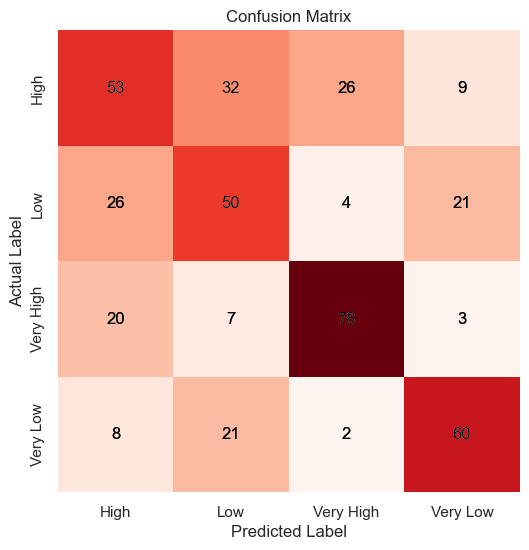

In [151]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True)

# Add value annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]), ha='center', va='center', color='black')

# Fix tick labels
tick_labels = ['High', 'Low', 'Very High', 'Very Low']
plt.xticks(ticks=np.arange(0.5, len(tick_labels)), labels=tick_labels)
plt.yticks(ticks=np.arange(0.5, len(tick_labels)), labels=tick_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


Looking at the heatmap confusion matrix, we can see that our model performs a better on Very High and Very Low. This is not surprising at all, seeing as those class labels have a much wider range of possible values when compared to High and Low. 

The target variable was discretized with the number in each bin being similar as the priority instead of each bin having the same or a similar range of possible values.

### Test the Model on New Data

Now, finally, we can test our model on data that the model did not use in the training process. This will let us know how well our model has generalized. Did it simply memorize the pattern, or can it make accurate predictions?

### Save the Model 

The 'joblib' package allows us to save the model.

In [152]:
from joblib import dump

# Save the model to a file
dump(clf, 'E:\\NSCC\\Semester_2\\GDAA2000_DataMining_Fundys\\Project_3\\models\\proj3_model_1.joblib')

['E:\\NSCC\\Semester_2\\GDAA2000_DataMining_Fundys\\Project_3\\models\\proj3_model_1.joblib']

You can load your model using the following approach.

In [153]:
from joblib import load

# Load the model from the file
loaded_model = load('E:\\NSCC\\Semester_2\\GDAA2000_DataMining_Fundys\\Project_3\\models\\proj3_model_1.joblib')

In [154]:
# Extract the predictors from Montreal_DAs_test
X_test = Montreal_DAs_test.drop(columns=['Rent_Spending_Quantiles'])

# Ensure that the column order in X_test matches the column order in X_train
X_test = X_test[X_train.columns]

# Make predictions using the loaded_model
predictions = loaded_model.predict(X_test)

# Display the predictions
print("Predictions on Montreal_DAs_test:")
print(predictions)


Predictions on Montreal_DAs_test:
['Very High' 'Very High' 'High' 'Very Low' 'High' 'Low' 'Low' 'Low' 'High'
 'Low' 'Low' 'Very High' 'Very Low' 'Very High' 'High' 'Low' 'Low' 'High']


Now let us compare the predicted values to the actual values.

In [155]:
# Extract the actual Rent_Spending_Quantiles values from Montreal_DAs_test
actual_values = Montreal_DAs_test['Rent_Spending_Quantiles']

# Create a DataFrame to store the actual and predicted values
predictions_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predictions})

# Display the DataFrame
print("Predictions on Montreal_DAs_test:")
print(predictions_df)


Predictions on Montreal_DAs_test:
         Actual  Predicted
1359       High  Very High
2749  Very High  Very High
2804       High       High
326        High   Very Low
603         Low       High
2669        Low        Low
2873        Low        Low
1930        Low        Low
687   Very High       High
2214  Very High        Low
2790   Very Low        Low
1609  Very High  Very High
3192   Very Low   Very Low
129   Very High  Very High
1813       High       High
2801        Low        Low
2575       High        Low
1428        Low       High


## Summary

In this project, the objectives were to create a standard Machine Learning workflow we had looked at in other programs, but implement it in Python. Then, using a range of variables from Business Analyst Canada 2023 dataset, produce an effective model for predicting a target variable using a Decision Tree classifier.

The model's performance was assessed using Classification Accuracy and a heatmap confusion matrix. Despite our efforts, the model achieved a sub-optimal Classification Accuracy of 55-60%. While the accuracy may not be satisfactory, using the context of how the target variable was binned, and the accuracy for the variables with wider range values compared to the other variables with a much smaller range, the results at least make sense.

Other than that, I will say that doing a similar project in R the first term, and again in Orange for project 2, it made tackling this project in Python much easier to swallow. Being familiar with a lot of the important terms, workflows, and visualizations, the learning curve of producing it in a different coding language was manageable. There was a surprising lack of troubleshooting and roadblocks with this project (apart from procrastination of course), which made tackling the content easier. 

Finally, I enjoy having to go out and acquire our own data before beginning the data manipulation, visualization and modelling. I feel like that is just as important of a skill as learning the more machine learning technical skills the project revolved around.